In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

print(f'Notebook initialized at {datetime.datetime.now()}.')

Notebook initialized at 2021-01-27 20:19:45.762421.


In [2]:
# sample wide data
sample_data = pd.DataFrame({
    'Date':['2004', '2005', '2006', '2007'],
    'CA':[10,20,30,40],
    'NY':[15,25,40,70],
    "MA":[20,15,10,5]
})

# melting to get long form data
df = sample_data.melt(id_vars='Date', value_name="Value", var_name="State")
df.head()

Date State  Value
0  2004    CA     10
1  2005    CA     20
2  2006    CA     30
3  2007    CA     40
4  2004    NY     15

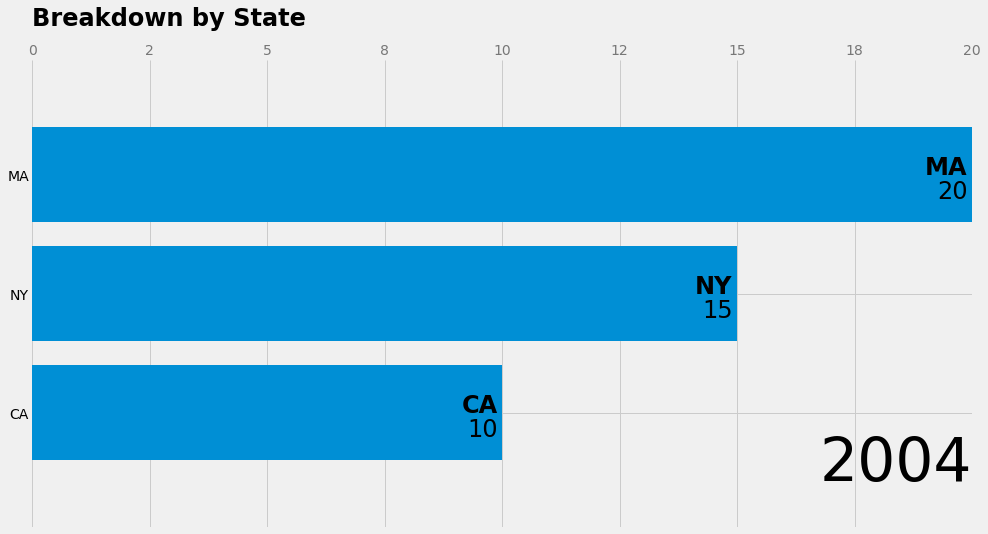

In [9]:
# styles:
font_size = 14
title_size = 24
year_size = 60
title = 'Breakdown by State'

# Initialize plot:
fig, ax = plt.subplots(figsize=(15,8))

def draw_barchart(year):
    
    ax.clear()
    
    # filter and sort current year data:
    dff = (df[df['Date'].eq(str(year))]
           .sort_values(by='Value', ascending=True)
           .head(10))
    
    ax.barh(dff.State, dff.Value)
    
    dx = dff['Value'].max() / 200 # dynamic padding
            
    # add labels:
    for i, (value, name) in enumerate(zip(dff['Value'], dff['State'])):
#         print(i, value, name)
        ax.text(value-dx, i, name, weight=600, ha='right', va='baseline', size=title_size)
        ax.text(value-dx, i-0.2, f'{value:,.0f}', ha='right', va='baseline', size=title_size)
        
    
    # Title and year labels
    ax.text(0, 1.075, title, size=title_size, weight=600, ha='left', transform=ax.transAxes)
    ax.text(1, 0.1, year, size=year_size, ha='right', transform=ax.transAxes)
    
    # styling
    plt.style.use('fivethirtyeight')
    ax.margins(0, 0.2)
#     ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.tick_params(axis='x', colors='#777777', labelsize=font_size)
    plt.box(False)

animator = animation.FuncAnimation(fig, draw_barchart, range(2004, 2008), interval=600)
HTML(animator.to_jshtml())
# HTML(animator.to_html5_video()) # FIXME - codec intallation issue...